In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Navigate to the specific folder
import os
project_folder = '/content/drive/My Drive/cs_145_project'
os.chdir(project_folder)

Mounted at /content/drive


In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import seaborn as sns

In [ ]:
# Getting each file
# Load the JSON file
with open('pid_to_info_all.json', encoding='utf-8') as file:
    data = json.load(file)
# Convert JSON data to a pandas DataFrame
pid_df = pd.DataFrame.from_dict(data, orient='index')

with open('ind_valid_author.json', encoding='utf-8') as file:
    data = json.load(file)
valid_df = pd.DataFrame.from_dict(data, orient='index')

with open('train_author.json', encoding='utf-8') as file:
    data = json.load(file)
# Convert JSON data to a pandas DataFrame
train_df = pd.DataFrame.from_dict(data, orient='index')

# PID

In [ ]:
# Display basic information about the DataFrame
print("\nDataFrame Info:")
print(pid_df.info())

print("\nDataFrame Head:")
print(pid_df.head())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 317302 entries, 6IsfnuWU to ebYfGt6j
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        317302 non-null  object
 1   title     317302 non-null  object
 2   authors   317302 non-null  object
 3   abstract  317302 non-null  object
 4   keywords  317302 non-null  object
 5   venue     317301 non-null  object
 6   year      317302 non-null  object
dtypes: object(7)
memory usage: 19.4+ MB
None

DataFrame Head:
                id                                              title  \
6IsfnuWU  6IsfnuWU  Probabilistic Skyline Operator over Sliding Wi...   
8B8GhlnI  8B8GhlnI  Editorial: Knowledge-Driven Activity Recogniti...   
4dZKGwVR  4dZKGwVR  Subscriber Assignment For Wide-Area Content-Ba...   
V1JgT3OM  V1JgT3OM  Tree-Based Mining for Discovering Patterns of ...   
HMvrPr2W  HMvrPr2W  Protein Function Prediction using Multi-label ...   

                

In [ ]:
# Display the number of unique authors
unique_authors = set()
for authors in pid_df['authors']:
    for author in authors:
        unique_authors.add(author['name'])

print(f"Number of Unique Authors: {len(unique_authors)}")

Number of Unique Authors: 732944


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(pid_df.isnull().sum())


Missing Values:
id          0
title       0
authors     0
abstract    0
keywords    0
venue       1
year        0
dtype: int64


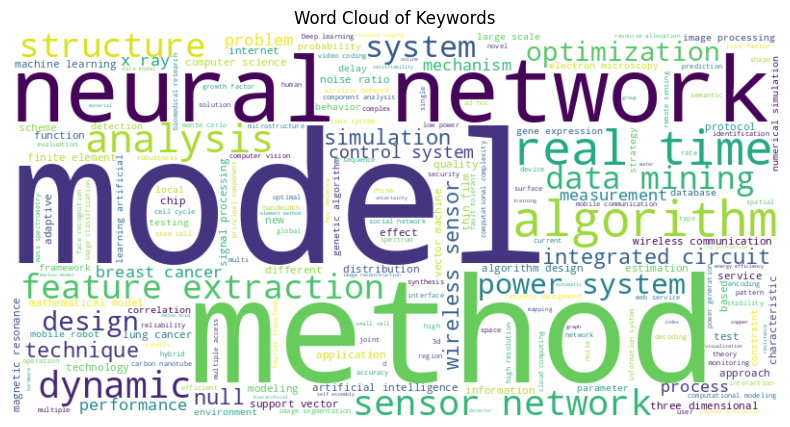

In [ ]:
# Generate a word cloud of keywords
all_keywords = ' '.join([' '.join(keywords) for keywords in pid_df['keywords'].dropna()])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords')
plt.show()

<ipython-input-8-beff196a5eab>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pid_df_sorted, x='year', palette='viridis')


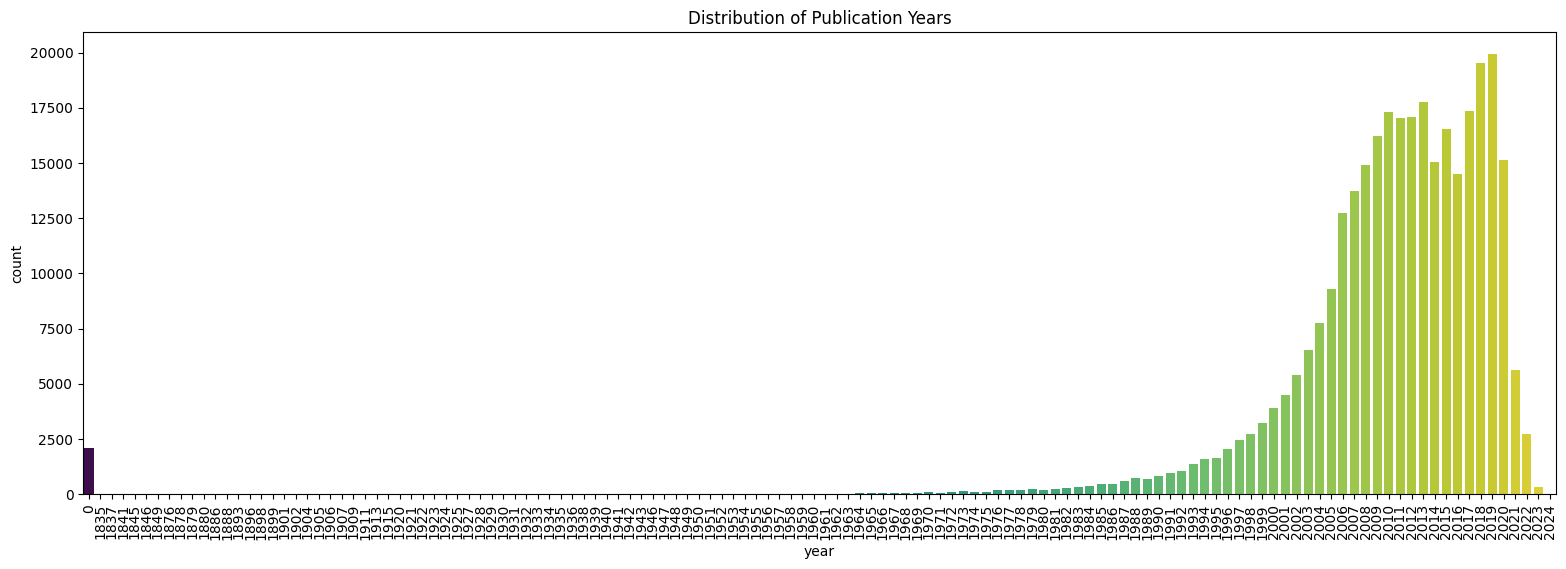

In [ ]:
# Handle non-numeric values in the 'year' column
pid_df['year'] = pd.to_numeric(pid_df['year'], errors='coerce')

# Drop rows with NaN values in the 'year' column
pid_df.dropna(subset=['year'], inplace=True)

# Convert 'year' column to integers
pid_df['year'] = pid_df['year'].astype(int)

# Sort the DataFrame by the 'year' column
pid_df_sorted = pid_df.sort_values(by='year')

# Distribution of publication years
plt.figure(figsize=(19, 6))
sns.countplot(data=pid_df_sorted, x='year', palette='viridis')
plt.title('Distribution of Publication Years')
plt.xticks(rotation=90)
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32479 (\N{CJK UNIFIED IDEOGRAPH-7EDF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

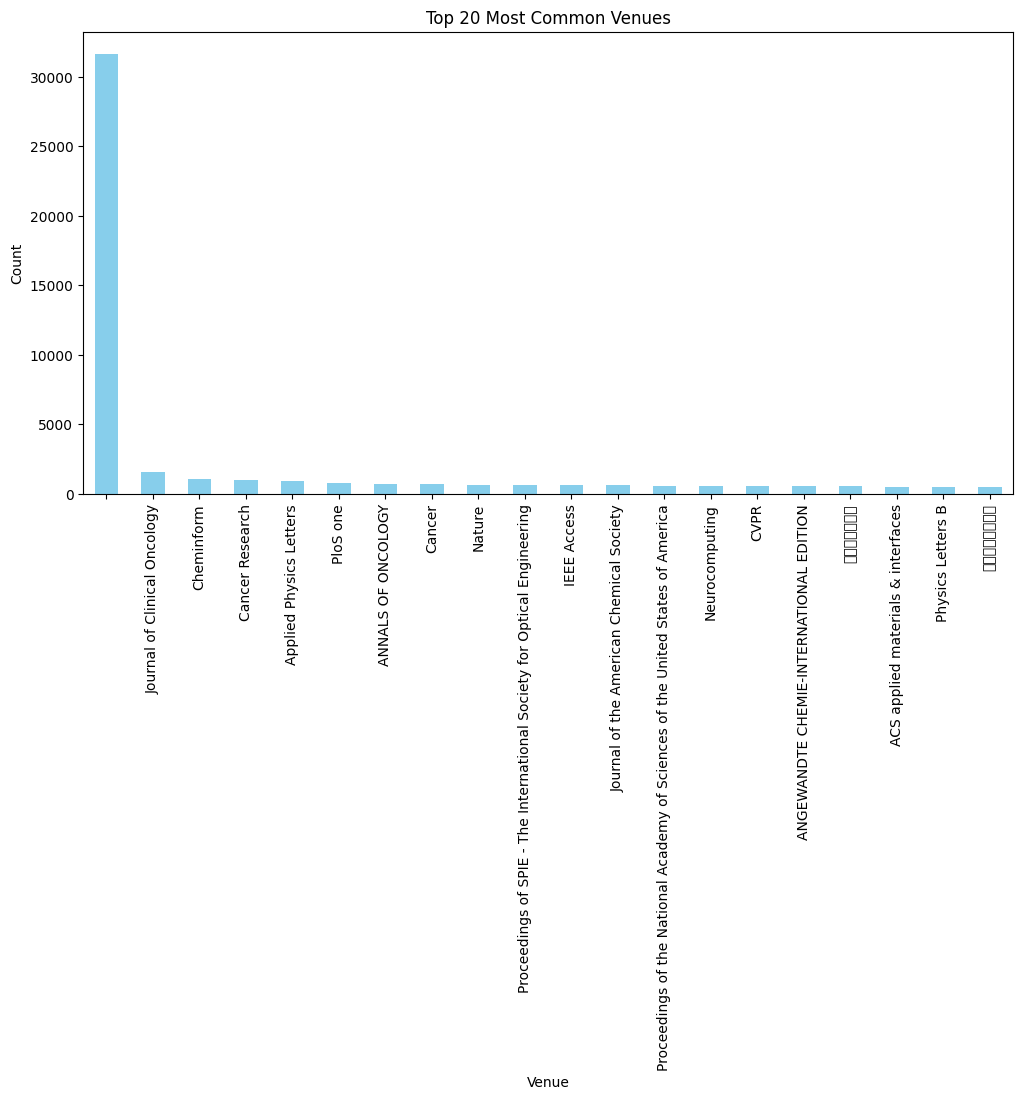

In [ ]:
# Most common venues
plt.figure(figsize=(12, 6))
pid_df['venue'].value_counts().head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Common Venues')
plt.xlabel('Venue')
plt.ylabel('Count')
plt.show()

<Figure size 2000x1000 with 0 Axes>

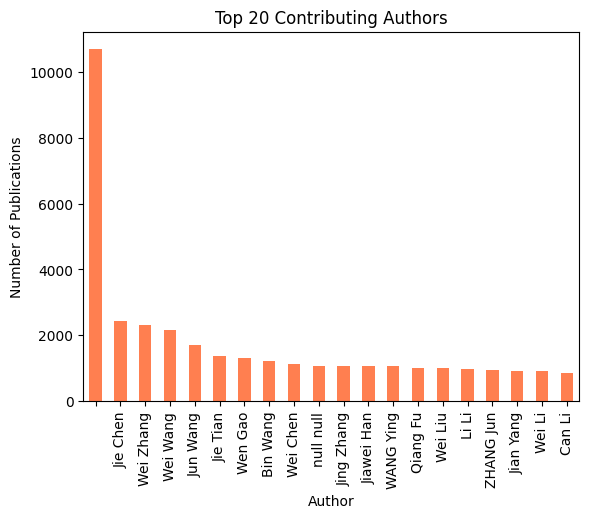

In [ ]:
# Top contributing authors
author_count = {}
for authors in pid_df['authors']:
    for author in authors:
        name = author['name']
        if name in author_count:
            author_count[name] += 1
        else:
            author_count[name] = 1

top_authors = pd.DataFrame.from_dict(author_count, orient='index', columns=['count']).sort_values(by='count', ascending=False).head(20)

plt.figure(figsize=(20, 10))
top_authors.plot(kind='bar', color='coral', legend=None)
plt.title('Top 20 Contributing Authors')
plt.xlabel('Author')
plt.ylabel('Number of Publications')
plt.xticks(rotation=90)
plt.show()

# TRAIN AUTHOR

In [ ]:
# Display basic information about the DataFrame
print("\nDataFrame Info:")
print(train_df.info())

# Display the head of the DataFrame
print("\nDataFrame Head:")
print(train_df.head())

# Display the number of unique authors
unique_authors = train_df.shape[0]
print(f"Number of Unique Authors: {unique_authors}")


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 779 entries, Iki037dt to UeEnjWiz
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         779 non-null    object
 1   normal_data  779 non-null    object
 2   outliers     779 non-null    object
dtypes: object(3)
memory usage: 24.3+ KB
None

DataFrame Head:
                    name                                        normal_data  \
Iki037dt  atsushi ochiai  [YzOCpPTO, AblgcGjH, B5aouLse, u1G7wBEv, W7w6P...   
ZihzMro7     mingwu yang  [C58t0yYu, sWIRnfR3, HJW8h2mo, 0Ptx4O5n, fU4vB...   
WXMYBk3c  jianzhao huang  [lJAIOXO4, fYJcce0K, ZaeOFAcI, kg9xDSXm, T37S3...   
WrCODHhe     xuebiao yao  [3fYoJb1W, wjt8Y8ho, pPx6o7KZ, xgRarLPn, 9w9yz...   
k3uSCGEE    shunlin tang  [gTeQer76, mVk2vmmN, TLKSll8D, Eg5NcmZ2, kM5Ip...   

                                                   outliers  
Iki037dt  [XL3wd3CP, BTKTiJp2, JxSjl5xc, 0jyMLgRt, uHWx8...  
ZihzM

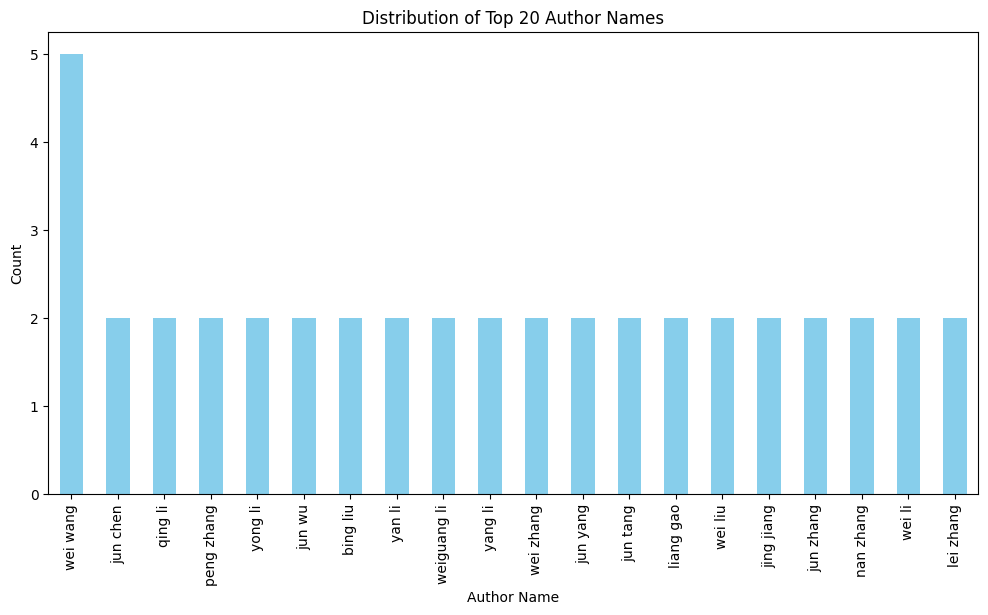

In [ ]:
# Get the top 20 author names
top_20_authors = train_df['name'].value_counts().nlargest(20)

# Plot the distribution
plt.figure(figsize=(12, 6))
top_20_authors.plot(kind='bar', color='skyblue')
plt.title('Distribution of Top 20 Author Names')
plt.xlabel('Author Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

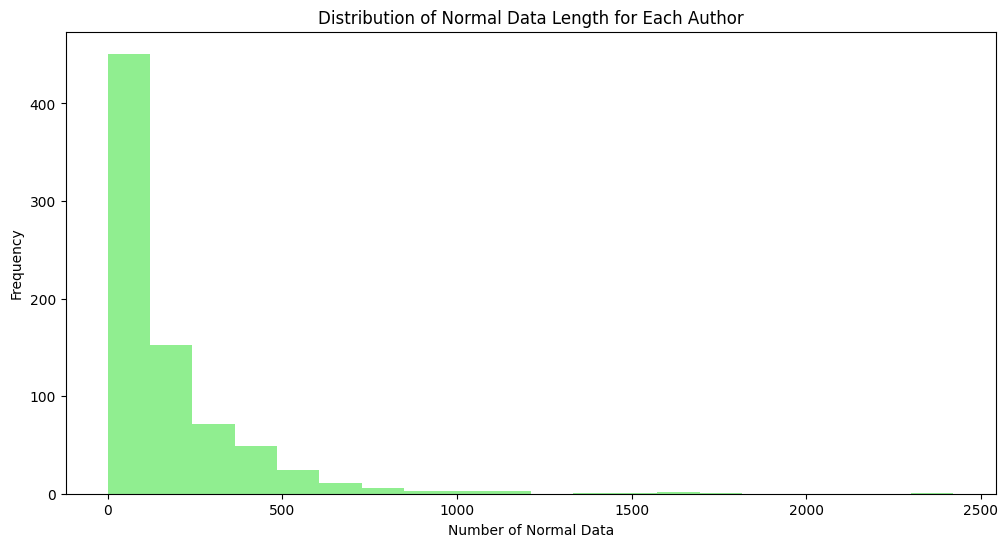

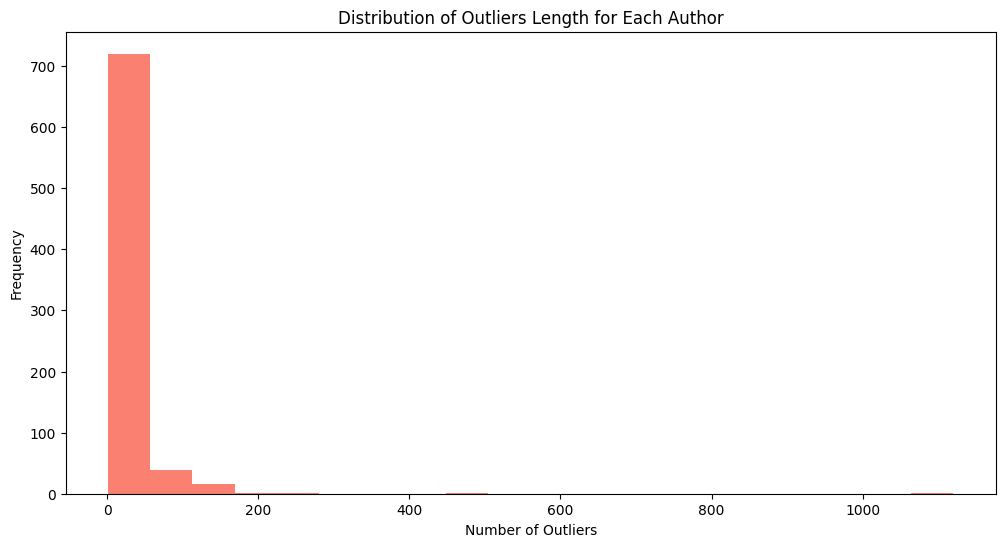

In [ ]:
plt.figure(figsize=(12, 6))
train_df['normal_data'].apply(len).plot(kind='hist', bins=20, color='lightgreen')
plt.title('Distribution of Normal Data Length for Each Author')
plt.xlabel('Number of Normal Data')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(12, 6))
train_df['outliers'].apply(len).plot(kind='hist', bins=20, color='salmon')
plt.title('Distribution of Outliers Length for Each Author')
plt.xlabel('Number of Outliers')
plt.ylabel('Frequency')
plt.show()

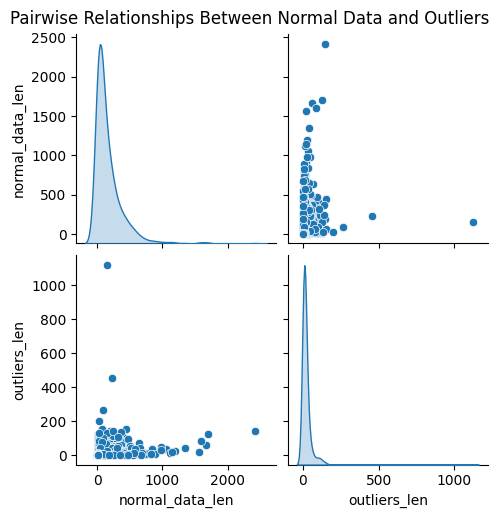

In [ ]:
# Pair plot: Relationships between normal data and outliers
pair_df = train_df.copy()
pair_df['normal_data_len'] = pair_df['normal_data'].apply(len)
pair_df['outliers_len'] = pair_df['outliers'].apply(len)

sns.pairplot(pair_df[['normal_data_len', 'outliers_len']], kind='scatter', diag_kind='kde')
plt.suptitle('Pairwise Relationships Between Normal Data and Outliers', y=1.02)
plt.show()